In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()

%matplotlib inline

df = pd.read_csv("bestsellers with categories.csv")
df

Saving bestsellers with categories.csv to bestsellers with categories (2).csv


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [3]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
df.shape

(550, 7)

In [5]:
print("Про скільки книг зберігає дані датасет?")
print(f"Відповідь: {df.shape[0]}")

Про скільки книг зберігає дані датасет?
Відповідь: 550


In [6]:
df.columns = ["name", "author", "user_rating", "reviews", "price", "year", "genre"]
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [7]:
nan_count = df.isna().sum()
nan_count

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [8]:
print("Чи є в якихось змінних пропуски? (Так / ні)")
print(f"Відповідь: Ні")

Чи є в якихось змінних пропуски? (Так / ні)
Відповідь: Ні


In [9]:
genre_unique = pd.unique(df["genre"])

genre_unique

array(['Non Fiction', 'Fiction'], dtype=object)

In [10]:
print("Які є унікальні жанри?")
print(f"Відповідь:{genre_unique}")

Які є унікальні жанри?
Відповідь:['Non Fiction' 'Fiction']


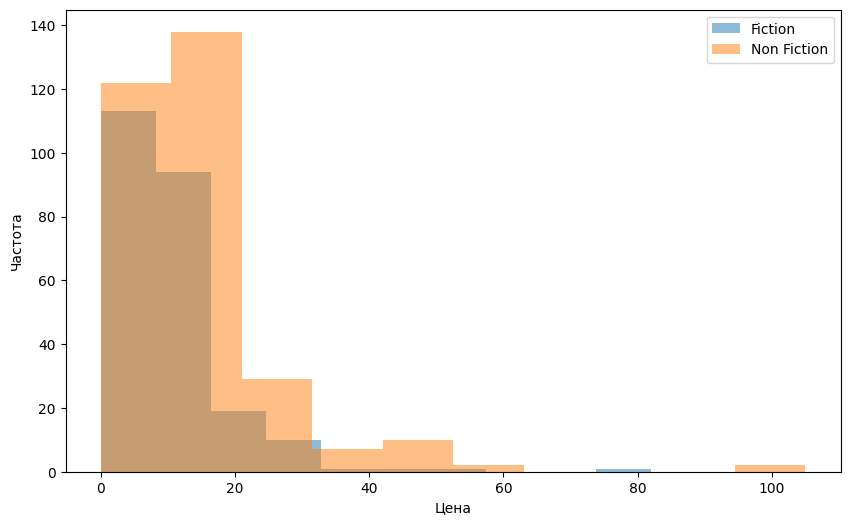

In [11]:
plt.figure(figsize=(10, 6))
df.groupby("genre")["price"].plot(kind="hist", bins=10, alpha=0.5, legend=True)
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.show()

In [13]:
price_min = df["price"].min()

price_max = df["price"].max()

price_mean = df["price"].mean()

price_median = df["price"].median()

In [15]:
print(f"Максимальна ціна {price_max}")
print(f"Мінімальна ціна {price_min}")
print(f"Середня ціна {price_mean}")
print(f"Медіанна ціна {price_median}")

Максимальна ціна 105
Мінімальна ціна 0
Середня ціна 13.1
Медіанна ціна 11.0


In [16]:
print(f"Відповідь: {df['user_rating'].max()}")

Відповідь: 4.9


In [17]:
count_max_rating = df[df['user_rating'] == df['user_rating'].max()].shape[0]
print(f"Відповідь: {count_max_rating}")

Відповідь: 52


In [18]:
max_reviews = df["reviews"].idxmax()
book_max_reviews = df.iloc[max_reviews]["name"]
print(f"Відповідь: {book_max_reviews}")

Відповідь: Where the Crawdads Sing


In [19]:
book_2015 = df[df["year"] == 2015]

book_max_2015 = df.iloc[book_2015["price"].idxmax()]["name"]
print(f"Відповідь: {book_max_2015}")

Відповідь: Publication Manual of the American Psychological Association, 6th Edition


In [20]:
books_top_fiction_2010 = df[(df["genre"] == "Fiction") & (df["year"] == 2010)].head(50)
print(f"Відповідь: {len(books_top_fiction_2010)}")

Відповідь: 20


In [21]:
books_top_2010_2011 = df[(df["user_rating"] == 4.9) & ((df["year"] == 2010) | (df["year"] == 2011))]
print(f"Відповідь: {len(books_top_2010_2011)}")

Відповідь: 1


In [22]:
books_price_2015 = df[(df["price"] < 8) & (df["year"] == 2015)].sort_values("price", ascending=False)
books_price_2015

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction
376,The Four Agreements: A Practical Guide to Pers...,Don Miguel Ruiz,4.7,23308,6,2015,Non Fiction
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction
224,Love You Forever,Robert Munsch,4.8,18613,5,2015,Fiction
28,Baby Touch and Feel: Animals,DK,4.6,5360,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
55,Creative Haven Owls Coloring Book (Adult Color...,Marjorie Sarnat,4.8,3871,5,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction


In [23]:
print(f"Відповідь: {books_price_2015['name'].iloc[-1]}")

Відповідь: To Kill a Mockingbird


In [24]:
genre_group = df.groupby("genre").agg({"price": ["min", "max"]})
genre_group

price     
              min  max
genre                 
Fiction         0   82
Non Fiction     0  105

In [25]:
print(f"Максимальна ціна для жанру Fiction: {df[df['genre'] == 'Fiction']['price'].max()}")

Максимальна ціна для жанру Fiction: 82


In [26]:
print(f"Мінімальна ціна для жанру Fiction: {df[df['genre'] == 'Fiction']['price'].min()}")

Мінімальна ціна для жанру Fiction: 0


In [27]:
print(f"Максимальна ціна для жанру Non Fiction: {df[df['genre'] == 'Non Fiction']['price'].max()}")

Максимальна ціна для жанру Non Fiction: 105


In [28]:
print(f"Мінімальна ціна для жанру Non Fiction: {df[df['genre'] == 'Non Fiction']['price'].min()}")

Мінімальна ціна для жанру Non Fiction: 0


In [29]:
df_authors = df.groupby("author").agg({"name": ["count"]})
df_authors

,name
,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2


In [30]:
print("Якої розмірності вийшла таблиця?")
print(f"Відповідь: {df_authors.shape}")

Якої розмірності вийшла таблиця?
Відповідь: (248, 1)


In [31]:
print("Який автор має найбільше книг?")
print(f"Відповідь: {df_authors.idxmax().iloc[0]}")

Який автор має найбільше книг?
Відповідь: Jeff Kinney


In [32]:
print("Скільки книг цього автора?")
print(f"Відповідь: {df_authors.max().iloc[0]}")

Скільки книг цього автора?
Відповідь: 12


In [33]:
df_authors_mean_rating = df.groupby("author").agg({"user_rating": ["mean"]}).round(1)
df_authors_mean_rating

,user_rating
,mean
author,
Abraham Verghese,4.6
Adam Gasiewski,4.4
Adam Mansbach,4.8
Adir Levy,4.8
Admiral William H. McRaven,4.7
...,...
Walter Isaacson,4.6
William Davis,4.4


In [34]:
print("У якого автора середній рейтинг мінімальний?")
print(f"Відповідь: {df_authors_mean_rating.idxmin().iloc[0]}")

У якого автора середній рейтинг мінімальний?
Відповідь: Donna Tartt


In [35]:
print("Який у цього автора середній рейтинг?")
print(f"Відповідь: {df_authors_mean_rating.min().iloc[0]}")

Який у цього автора середній рейтинг?
Відповідь: 3.9


In [36]:
df_authors_new = pd.concat([df_authors, df_authors_mean_rating], axis=1)
df_authors_new

,name,user_rating
,count,mean
author,,
Abraham Verghese,2,4.6
Adam Gasiewski,1,4.4
Adam Mansbach,1,4.8
Adir Levy,1,4.8
Admiral William H. McRaven,1,4.7
...,...,...
Walter Isaacson,3,4.6
William Davis,2,4.4


In [37]:
df_authors_new = df_authors_new.sort_values([('name', 'count'), ('user_rating', 'mean')], ascending=False)
df_authors_new

,name,user_rating
,count,mean
author,,
Jeff Kinney,12,4.8
Rick Riordan,11,4.8
Gary Chapman,11,4.7
Suzanne Collins,11,4.7
American Psychological Association,10,4.5
...,...,...
Rob Bell,1,4.2
Chris Cleave,1,4.1


In [38]:
print("Який автор перший у списку?")
print(f"Відповідь: {df_authors_new.idxmax().iloc[0]}")

Який автор перший у списку?
Відповідь: Jeff Kinney


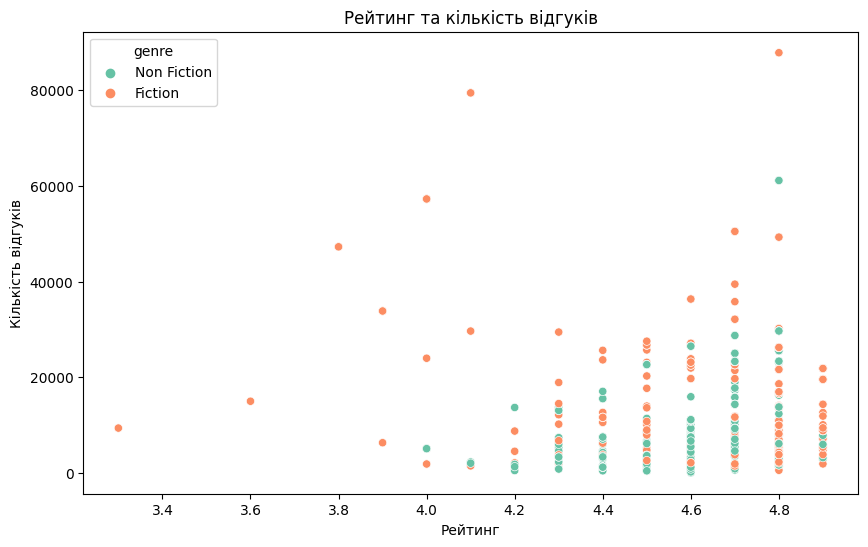

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="user_rating", y="reviews", data=df, hue="genre", palette="Set2")
plt.title("Рейтинг та кількість відгуків")
plt.xlabel("Рейтинг")
plt.ylabel("Кількість відгуків")
plt.show()

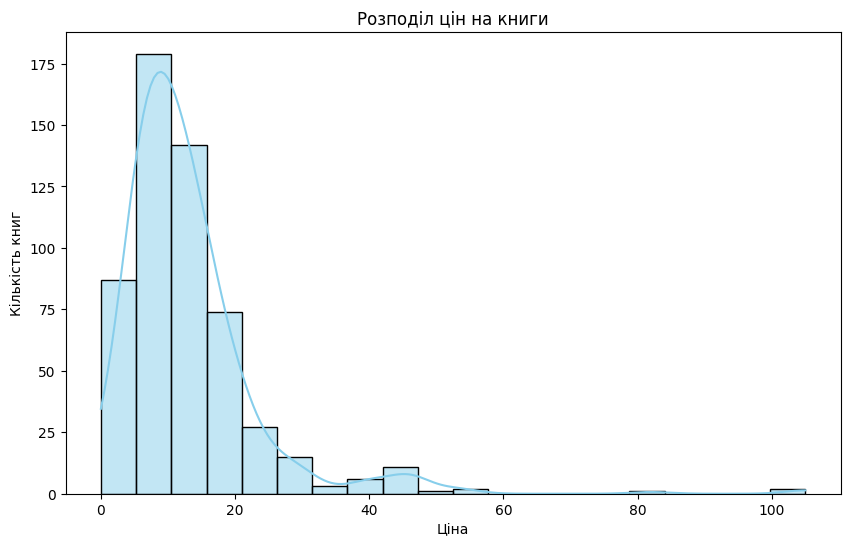

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(df["price"], bins=20, kde=True, color="skyblue")
plt.title("Розподіл цін на книги")
plt.xlabel("Ціна")
plt.ylabel("Кількість книг")
plt.show()